# Современные методы анализа данных и машинного обучения, БИ

## НИУ ВШЭ, 2024-25 учебный год

## Групповой проект №1. Exploratory Data Analysis

## Общая информация

__Дата выдачи:__ 28.01.2025

__Защита проекта:__ 12.02.2025

## Описание задания

<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  

В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  



### Описание признаков


* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA.
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный числом.
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user rating size` - общий рейтинг пользователей.

### Требования к проекту



В качестве результата выполнения группового проекта ваша команда должна получить презентацию и защитить ее перед комиссией.

Оформление презентации остаётся полностью на ваше усмотрение, но помните, что результат должен быть релевантен для демонстрации бизнес-заказчику — комиссию, принимающую вашу работу, правильнее всего воспринимать именно в таком качестве. Например, вставлять в презентацию строчки кода или злоупотреблять скринами блокнота не рекомендуется.

С точки зрения концепции выполнения проекта — вам необходимо принять на себя роль аналитиков: провести работу над признаками, исследовать информацию, содержащуюся в датасете,  выявить тенденции, тренды, факты из данных, а также, конечно, презентовать всё это в понятном виде.

Фактически, можно воспринимать этот проект в следующем ключе: к вам пришел некий бизнес-заказчик — например, это может быть непосредственно представитель Netflix, которые хотят улучшить какие-то процессы; или какая-то компания, которая хочет снять какой-то новый проект и/или продать какой-то свой уже готовый продукт Netflix'у; или это может быть некая компания конкурент Netflix'a, которая заинтересована в общем исследовании рынка; или абсолютно любой другой стейхолдер в рамках данной отрасли — и вот этот заказчик просит вас проанализировать данные и извлечь на основе них какие-то полезные и значимые бизнес-инсайты для него. Разумеется, чем глубже, чем осмысленнее и чем нетривиальнее будут эти выводы, тем больше они вам заплатят :)


 # Загрузка датасета



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import scipy.stats as stats

In [3]:
pd.options.display.float_format ='{:,.3f}'.format

In [4]:
url = 'https://github.com/KikoMan89/gp1/raw/main/NetflixShows.xlsx'
data = pd.read_excel(url, sheet_name='NetflixShows')
del data['ratingDescription'], data['user rating size']
data['title'] = data['title'].astype(str)

In [5]:
data.head(5)

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.000
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.000
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.000
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.000


In [6]:
data.shape

(1000, 5)

* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA.
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный числом.
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user rating size` - общий рейтинг пользователей.

Из оригинального датасета были удалены столбцы  `ratingDescription` (рейтинг шоу, закодированный числом) и `user rating size` (общий рейтинг пользователей).

# Целевая переменная

В качестве целевой переменной возьмём `user rating score`. Данная переменная представляет наибольший интерес для нашего анализа и заказчика. Нашей задачей может являться прогнозирование пользовательского рейтинга, например для улучшения алгоритмов рекомендаций или для анализа успешности предстоящих проектов.

# Работа с пропусками

In [7]:
data.isna().sum()

title                  0
rating                 0
ratingLevel           59
release year           0
user rating score    395
dtype: int64

Как мы можем увидеть пропуски есть в `user rating score` (395) и в `ratingLevel` (59)

###Причины пропусков в этих столбцах

`user rating score`
* Шоу без оценки - Данные шоу могли быть не оценены зрителями, возможно они всегда пропускают данный этап или возможно система не предлагала им оставить отзыв

`ratingLevel`
* Отсутствие информации в исходных данных - Шоу могло быть добавлено без описания уровня рейтинга или возможные ошибки при сборе данных


### Работа с пропусками в `ratingLevel`

In [8]:
data['ratingLevel'].value_counts().head(10)

ratingLevel
Parents strongly cautioned. May be unsuitable for children ages 14 and under.    224
General Audiences. Suitable for all ages.                                        134
Suitable for all ages.                                                           120
For mature audiences.  May not be suitable for children 17 and under.            110
Parental guidance suggested. May not be suitable for all children.                54
Suitable for children ages 7 and older.  Content contains fantasy violence.       44
Suitable for children ages 7 and older                                            38
Parental guidance suggested. May not be suitable for children.                    21
This movie has not been rated.                                                    11
mild thematic elements                                                             7
Name: count, dtype: int64

In [9]:
data['ratingLevel'].isna().sum()

59

Так как в данном столбце пропусков незначительное количество относительно всего датасета, резонней будет заполнить эти пропуски, например на слово *Unknown*

In [10]:
data['ratingLevel'] = data['ratingLevel'].fillna('Unknown')

In [11]:
data.isna().sum()

title                  0
rating                 0
ratingLevel            0
release year           0
user rating score    395
dtype: int64

Теперь в нашем датасете меньше пропусков!

Теперь нужно придумать, что делать с пропусками в целевой переменной.

In [12]:
data['user rating score'].isna().sum()

395

Пропусков довольно много! Так как это целевая переменная, заполнять ее или делать обычные преобразования будет некорректным, но и удалять все пропуски нельзя, т.к тогда пропадет большое количество строк и это может отразиться на дальнейшем анализе. Поэтому наша команда приняла решение рассматривать датасет с пропусками по столбцу `user rating score` и **только** при анализе целевой переменной, удалять пропуски.

# Работа с дубликатами

Посмотрим сколько дубликатов в нашем датасете!

In [13]:
data_duplicates = data.duplicated(keep = False)
data_duplicates.sum()

744

В таблице обнаружено очень много повторяющихся строк. Посмотрим какие шоу повторялись чаще всего.

In [14]:
title_duplicates = data.groupby('title').size().reset_index(name='count')
td = title_duplicates[title_duplicates['count'] > 1]
td.sort_values(by=['count'], ascending=False).head(10)

,title,count
3,13 Reasons Why,8
317,Prison Break,7
152,Girlboss,7
351,Shameless (U.S.),6
275,New Girl,6
28,Anastasia,6
160,Grace and Frankie,6
316,Pretty Little Liars,6
163,Grey's Anatomy,6
113,Dinotrux,6


Можно увидеть какие сериалы повторялись чаще всего. Сейчас посмотрим в каких рейтинговых группах больше всего дубликатов

In [15]:
rating_duplicates = data[data.duplicated()]
rd = rating_duplicates.groupby(['rating']).size().reset_index(name='count').sort_values(by=['count'], ascending=False)
rd.head(5)

,rating,count
5,TV-14,128
2,PG,94
0,G,85
7,TV-MA,66
9,TV-Y,32


После всех проделанных действий, нельзя однозначно сказать почему появились дубликаты, тогда проделаем более глубокий анализ, предварительно удалив дубликаты.

In [16]:
df = data.drop_duplicates(keep = 'first')
df.shape[0]

500

Посмотрим на изменения количества шоу до и после удаления дубликатов по категории рейтинга и по оценке пользователей.

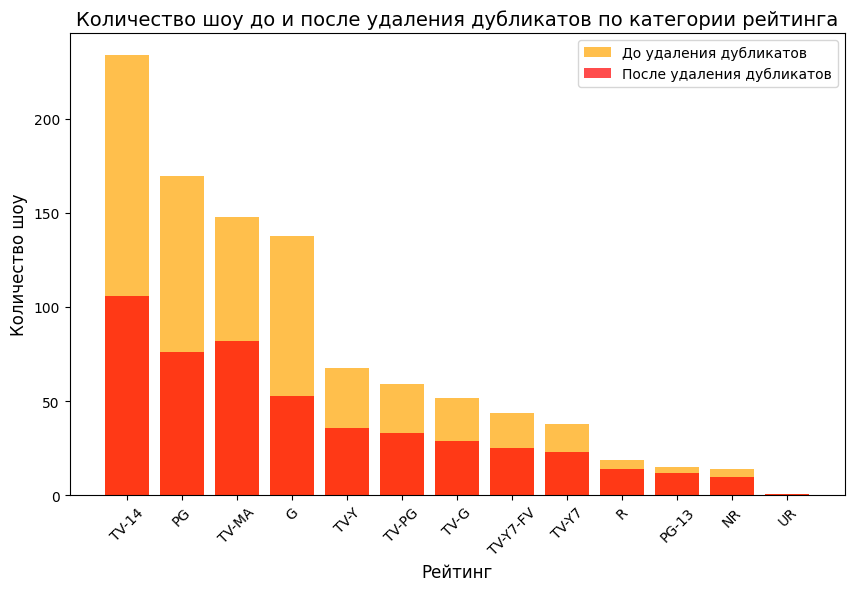

In [17]:
shows_before = data.groupby('rating')['title'].size().reset_index(name='До удаления дубликатов')

shows_after = df.groupby('rating')['title'].size().reset_index(name='После удаления дубликатов')

merged_shows = shows_before.merge(shows_after, on='rating', how='left').fillna(0)

mf_sorted = merged_shows.sort_values(by='До удаления дубликатов', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(mf_sorted['rating'], mf_sorted['До удаления дубликатов'], label='До удаления дубликатов', color='orange', alpha=0.7)
plt.bar(mf_sorted['rating'], mf_sorted['После удаления дубликатов'], label='После удаления дубликатов', color='red', alpha=0.7)

plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Количество шоу', fontsize=12)
plt.title('Количество шоу до и после удаления дубликатов по категории рейтинга', fontsize=14)
plt.legend()
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.show()


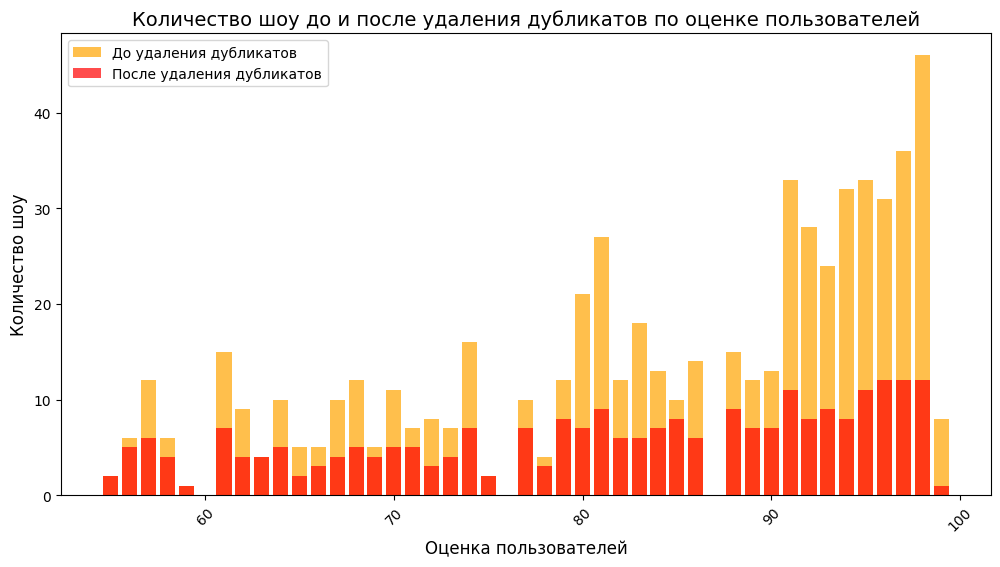

In [18]:
tf_before_score = data.groupby('user rating score').size().reset_index(name='До удаления дубликатов')

tf_after_score = df.groupby('user rating score').size().reset_index(name='После удаления дубликатов')

mf_score = tf_before_score.merge(tf_after_score, on='user rating score', how='outer').fillna(0)

mf_score_sorted = mf_score.sort_values(by='До удаления дубликатов', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(mf_score_sorted['user rating score'], mf_score_sorted['До удаления дубликатов'], label='До удаления дубликатов', color='orange', alpha=0.7)
plt.bar(mf_score_sorted['user rating score'], mf_score_sorted['После удаления дубликатов'], label='После удаления дубликатов', color='red', alpha=0.7)

plt.xlabel('Оценка пользователей', fontsize=12)
plt.ylabel('Количество шоу', fontsize=12)
plt.title('Количество шоу до и после удаления дубликатов по оценке пользователей', fontsize=14)
plt.legend()
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Всего дубликатов - 500

Наибольшее кол-во дубликатов:

*   128 - (рейтинг `TV-14`)
*   94 - (рейтинг `PG`)
*   85 - (рейтинг `G`)
*   66 - (рейтинг `TV-MA`)
*   32 - (рейтинг `TV-Y`)


Возможные причины возникновения(теории):
1. Переиздание шоу для разных стран (например в Китае нельзя показывать черепа и тд.)
2. Разный дубляж: если шоу выпущено на нескольких языках, оно может быть дублированно

Заметим что есть тенденция между оценкой шоу и сколько они имеют дубликатов, возможно данные собирались не непосредственно с сайта Netflix, а с сайтов с обзорами шоу или с статьями про шоу, этим можно объяснить количество NaN в user score rating (так как не все статьи указывают пользовательский рейтинг на Netflix) а также количество дубликатов, про хорошие шоу выходит много статей и они будут в нашем датафрейме повторяться

### Рейтинговые группы

In [19]:
df['rating'].nunique()

13

In [20]:
df['rating'].unique()

array(['PG-13', 'R', 'TV-14', 'TV-PG', 'TV-MA', 'TV-Y', 'NR', 'TV-Y7-FV',
       'UR', 'PG', 'TV-G', 'G', 'TV-Y7'], dtype=object)

Всего в датасете представленно **13** рейтиговых групп: `PG-13`, `R`, `TV-14`, `TV-PG`, `TV-MA`, `TV-Y`, `NR`, `TV-Y7-FV`, `UR`, `PG`, `TV-G`, `G`, `TV-Y7`. Посмотрим какие из них встречаются наиболее часто

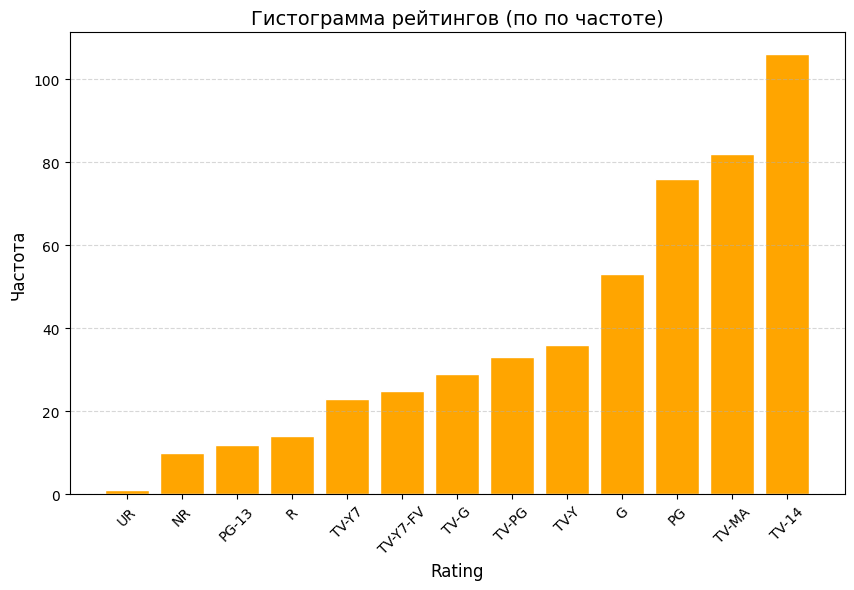

In [21]:
sr = df['rating'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
plt.bar(sr.index, sr.values, color='orange', edgecolor='white')

plt.xlabel('Rating', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.title('Гистограмма рейтингов (по по частоте)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.xticks(rotation=45)
plt.show()

По данному графику можно увидеть, что:
* `NR`, `UR`  - низкая популярность
* `PG-13`, `R` - средняя популярность
* Детские и подростковые шоу (`TV-Y7`, `TV-Y7-FV`, `TV-G`, `TV-PG`, `TV-Y`) - высокая популярность
* Семейные (`G`, `PG`) - очень высокая популярность
* Взрослые и подростковые шоу (`TV-MA`, `TV-14`) - самая высокая популярность

Почему `TV-14` и `TV-MA` так популярны?

Основная аудитория `Netflix` - подростки и взрослые, т.к они платежеспособная аудитория и основной контент `Netflix` направлен на них

### В какие годы были запущены шоу?

In [22]:
shows_years = df[['title', 'release year']].sort_values(by='release year')
shows_years

,title,release year
761,Fantasia,1940
506,The Smurfs and the Magic Flute,1976
252,Grease,1978
772,The Last Unicorn,1982
658,Annie,1982
...,...,...
25,Marvel's Iron Fist,2017
81,Love,2017
41,13 Reasons Why,2017
348,Felipe Neto: My Life Makes No Sense,2017


Давайте посмотрим в какие годы были запущены шоу с помощью гистограммы

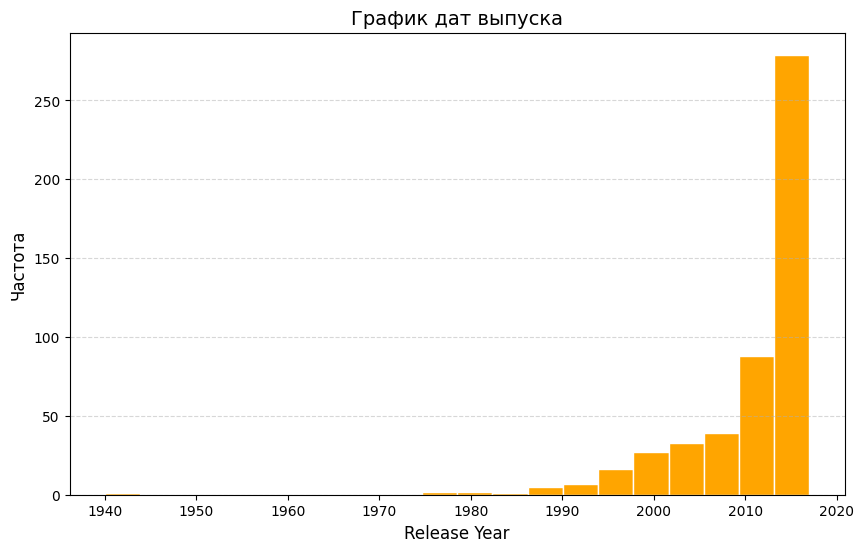

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(df['release year'], bins=20, color='orange', edgecolor='white')

plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.title('График дат выпуска', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)

Из-за масштабирования по годам растянуто с 1940 года, можно сказать что между 2010 - 2020 выбросы, но давайте посмотрим что будет, если не включать шоу раньше 1987 года. *(данный год был выбран, т.к на графике заметно что в интервале с 1980 по 1990, рост приходится на 2 половину графика)*

In [24]:
df = df[df['release year'] >= 1987]

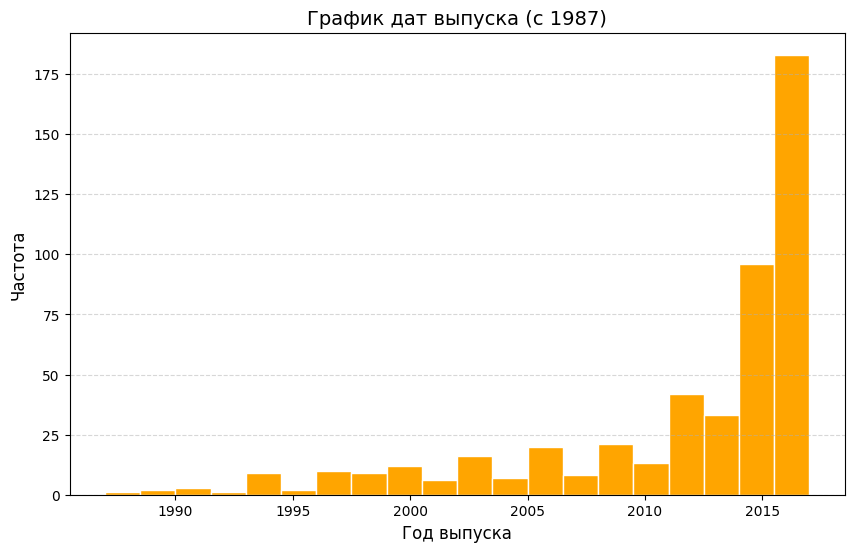

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(df['release year'], bins=20, color='orange', edgecolor='white')

plt.xlabel('Год выпуска', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.title('График дат выпуска (c 1987)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

Заметен явный рост, особенно в последние года, начиная с 2010 года. Это связано с тем, что Netflix  создает все больше и больше оригинальных и популярных шоу.



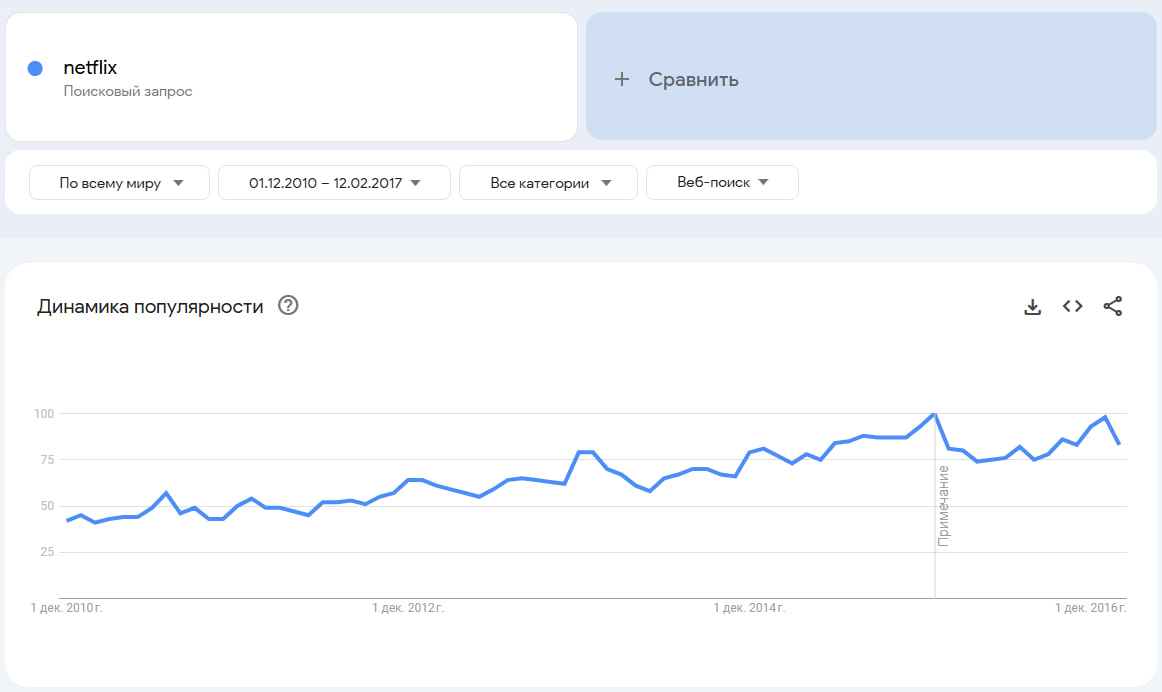



* Есть выбросы по количеству шоу за год - это 2016 год, есть очень старые шоу которые мы отсекли и не стали рассматривать
*  Выброс 2016 года вызван тем, что: "В 2016 году компания выпустила 126 оригинальных сериалов и фильмов — больше, чем любой другой сетевой или кабельный канал" ([инфа отсюда](https://ru.wikipedia.org/wiki/Netflix)).

### Анализ `user rating score`. Какие оценки пользователи ставят чаще?



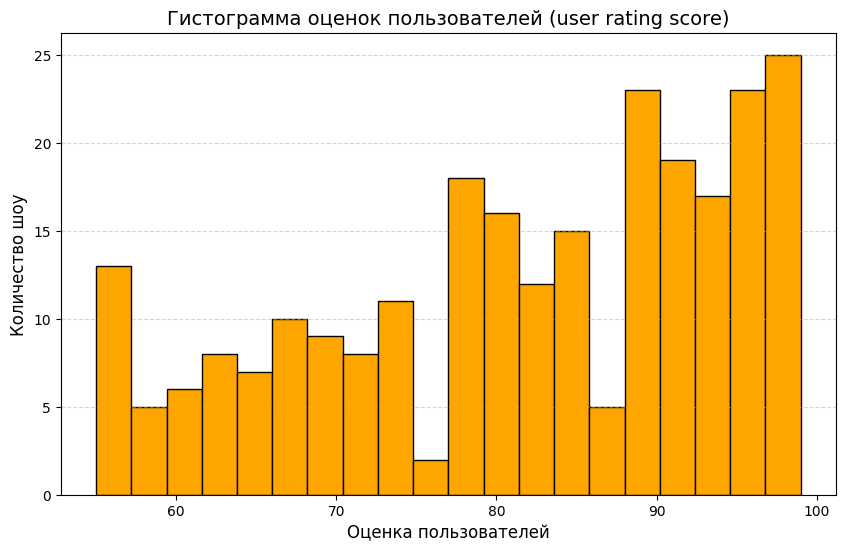

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(df['user rating score'], bins=20, color='orange', edgecolor='black')

plt.xlabel('Оценка пользователей', fontsize=12)
plt.ylabel('Количество шоу', fontsize=12)
plt.title('Гистограмма оценок пользователей (user rating score)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)

Нетрудно отследить что пользователи чаще ставят оценки в диапазоне 80 - 100, наиболее часто что можно заметить по пикам, в районе(≈80-85) и (≈90-97).

Мало низких оценок (<60), но иногда прослеживается что пользователи оценивают шоу средне, это можно заметить по пикам(≈65), (≈70) и (≈78).

Причины почему пользователи зачастую ставят шоу высокую оценку:


* Система рекомендаций Netflix: система рекомендаций показывает пользователям контент, который скорее всего понравится пользователям, что приводит к таким результатам.

* Популярность шоу: Если шоу "стрельнуло" , то пользователи скорее всего высоко оценят его из-за всеобщей популярности, как пример - "Squid game"

* Аудитория: Зачастую если людям не нравится шоу, они просто перестают его смотреть и даже не ставят оценок, но если человеку действительно понравилось шоу, он скорее всего поставит ему оценку. Иногда конечно люди могут досмотреть шоу которое им не понравилось и поставить не очень хорошую оценку.

* Сбор датасета: как ранее было сказано возможно датасет собирался не случайным парсингом а по статьям от самих же Netflix, или по каким либо рецензиям






## Основная информация об оценках пользователей



Давайте проверим, какие оценки выставлялись чаще всего?

In [27]:
df['user rating score'].value_counts().head()

user rating score
97.000    12
96.000    12
98.000    12
95.000    11
91.000    11
Name: count, dtype: int64

Самыми частовыставляемыми оценками являются: `97`, `96`, `98`, `95` и `91`.

Проверим, чему равны `среднее`, `стандартное отклонение`, `минимум`, `максимум` и `медиана`?

In [28]:
user_ratings_stats = df['user rating score'].agg(['mean', 'std', 'min', 'median', 'max'])
user_ratings_stats

mean     81.571
std      12.702
min      55.000
median   84.000
max      99.000
Name: user rating score, dtype: float64

Проанализируем нашу переменную `user rating score` с помощью графика boxplot

In [29]:
fig = px.box(df, x='user rating score', title='boxplot пользовательских оценок')
fig.update_layout(xaxis_title='User Rating Score')

fig.show()

 Почему отличаются медиана и среднее?

 Могут ли они вообще значительно отличаться? Почему?

Медиана(83.5) больше среднего(81.4). Разница между ними небольшая, что говорит об относительно симметричном распределении оценок без значительных выбросов,но все же стоит сказать, что уклон идет в сторону высоких оценок. Также можно заметить что график ассиметричен.

Могут ли данные характеристики значительно отличаться? Почему?

Да, могут, т.к  низкие оценки тянут среднее вниз, а медиана остается ближе к основной массе, а как нам известно медиана более устойчива к выбросам.

Посмотрим сравнение средних значений по рейтингам за все годы начиная с 1987

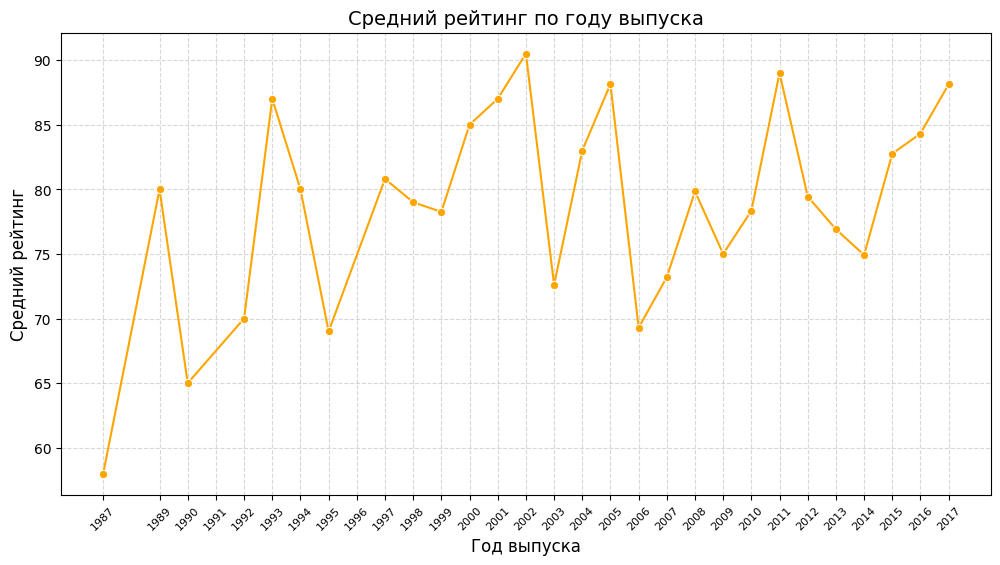

In [30]:
rating_year = df.groupby('release year')['user rating score'].mean().reset_index()
plt.figure(figsize=(12, 6))

sns.lineplot(data=rating_year, x='release year', y='user rating score', marker='o', color='orange')

plt.xticks(rating_year['release year'].values, rotation=45, fontsize=8)

plt.xlabel('Год выпуска', fontsize=12)
plt.ylabel('Средний рейтинг', fontsize=12)
plt.title('Средний рейтинг по году выпуска', fontsize=14)
plt.grid(linestyle='--', alpha=0.5)

plt.show()

Как таковой зависимости среднего рейтинга от года выпуска нет. Были годы, в которые выходили успешные с точки зрения пользовательского рейтинга шоу, а были и обратные.

## Сравнение средней оценки пользователей в 2016 со средней оценкой в 2017.
- Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки)
- Как еще можно оценить "Успешность"?



In [31]:
ratings_2016 = df[df['release year'] == 2016]['user rating score'].dropna()
ratings_2017 = df[df['release year'] == 2017]['user rating score'].dropna()

comparison = pd.DataFrame({
    "Год": [2016, 2017],
    "Средняя оценка": [ratings_2016.mean(), ratings_2017.mean()]
})
comparison

,Год,Средняя оценка
0,2016,84.314
1,2017,88.125


In [32]:
nt16 = df[df['release year'] == 2016]['title'].dropna()
nt17 = df[df['release year'] == 2017]['title'].dropna()
twoyearsshows = pd.DataFrame({
    "Год": [2016, 2017],
    "Кол-во шоу": [nt16.shape[0], nt17.shape[0]]
})
twoyearsshows

,Год,Кол-во шоу
0,2016,146
1,2017,37


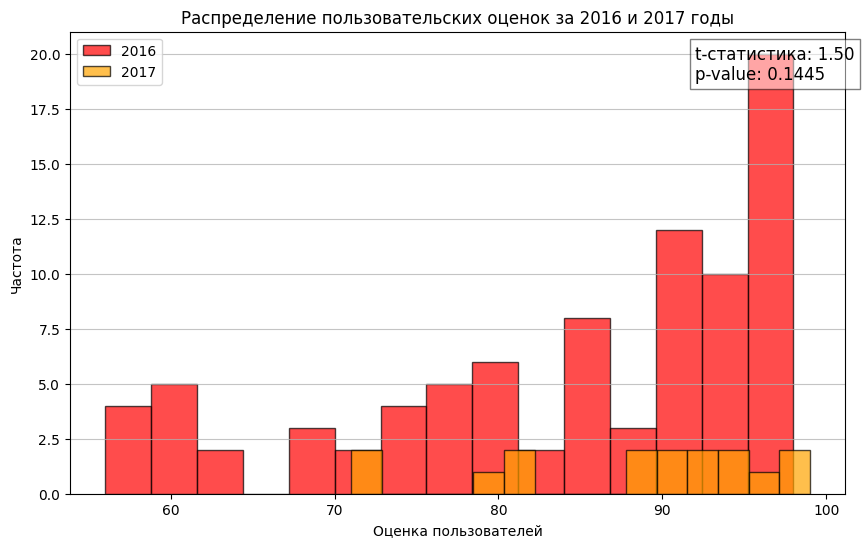

In [33]:
import scipy.stats as stats

df_2016 = df[df['release year'] == 2016]['user rating score'].dropna()
df_2017 = df[df['release year'] == 2017]['user rating score'].dropna()

t_stat, p_value = stats.ttest_ind(df_2017, df_2016, equal_var=False)

plt.figure(figsize=(10, 6))
plt.hist(df_2016, bins=15, alpha=0.7, color='red', label='2016', edgecolor='black')
plt.hist(df_2017, bins=15, alpha=0.7, color='orange', label='2017', edgecolor='black')

plt.xlabel('Оценка пользователей')
plt.ylabel('Частота')
plt.title('Распределение пользовательских оценок за 2016 и 2017 годы')
plt.legend()
plt.grid(axis='y', alpha=0.75)

plt.figtext(0.75, 0.8, f"t-статистика: {t_stat:.2f}\np-value: {p_value:.4f}", 
            fontsize=12, bbox={"facecolor": "white", "alpha": 0.5})

plt.show()
 

**Можно ли сказать, что 2017 год успешнее?**

Мы провели t-тест о равенстве мат ожиданий и на уровне значимости 85%, что не сказать что много, 2017 год успешнее по оценкам пользователей. Использование t-test было вызвано несколькими причинами, а именно количество фильмов которые представлены в изначальном датасете, их намного меньше в 2017 году чем в 2016, но это возможно вызвано датой сбора самого датасета, его актуальность стоит под вопросом, но так как самый последний год который у нас есть это 2017 будет корректнее предположить что сбор датасета был точно не в 2018 году, а возможно даже в самом начале 2017

### Как нагляднее будет показать распределение пользователей по рейтинговым группам?

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? ([Подсказка](https://sun9-40.userapi.com/c854228/v854228652/c754f/j6z5gMjJy2k.jpg))  
Постройте самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

Может быть, можно использовать и какие-то другие, еще более продвинутые визуализации?


![Charts](https://pp.userapi.com/c852024/v852024281/1a53b1/jSOsBIhxK3U.jpg)

In [34]:
df_pie = df['rating'].value_counts().reset_index()
df_pie.columns = ['rating', 'count']

df_pie = df_pie.sort_values(by='count', ascending=False).reset_index(drop=True)

colors = [plt.cm.Reds(i) for i in np.linspace(0.8, 0.1, 13)]
colors = ['#%02x%02x%02x' % (int(r*255), int(g*255), int(b*255)) for r, g, b, _ in colors]

discrete_colors = colors[:len(df_pie)]

fig = px.pie(
    df_pie, 
    names='rating', 
    values='count', 
    title='Распределение шоу по рейтинговым группам', 
    hole=0.4,
    color='rating',
    color_discrete_sequence=discrete_colors 
)

fig.show()


Отсылая к уже построенной гистограмме по рейтинговым группам (было в самом начале), сравнивая с круговой можно четко сказать, что последняя намного читаемее и к тому же интерактивная. Как мы уже выяснили до этого, самыми большими группами стали - TV-14, TV-MA, PG. Следовательно наиболее снимаемые шоу для детей 14+, топ-2 материал 18+, а топ-3 13+ контент, рекомендуется присутствие родителей.

#### Теперь вам нужно выбрать любое из представленных шоу и при помощи изученных инструментов составить описательный портрет этого шоу :)

Аналитики и Data Scientist-ы очень любят все сравнивать, поэтому при составлении описательного портрета рекомендуем вам сравнить выбранное шоу с другими по каким-либо характеристикам.

In [35]:
friends_show = df[df['title'] == "Friends"].iloc[0]

friends_show

title                                                          Friends
rating                                                           TV-14
ratingLevel          Parents strongly cautioned. May be unsuitable ...
release year                                                      2003
user rating score                                               98.000
Name: 64, dtype: object

Видим, что по рейтингу сериал супер успешен. Выпустился в 2003 году и получил рейтинг TV-14. Далее посмотрим где он находится по рейтингу среди остальных.

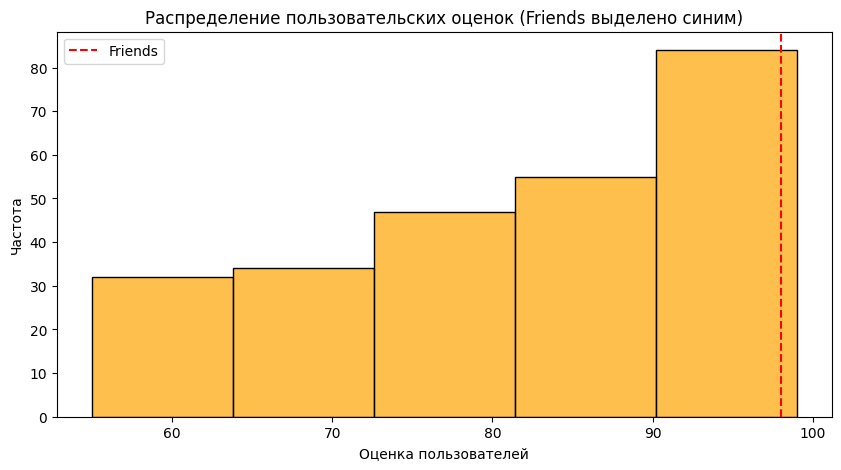

In [36]:
plt.figure(figsize=(10, 5))
sns.histplot(df['user rating score'], bins=5, color='orange', alpha=0.7)
plt.axvline(friends_show['user rating score'], color='red', linestyle='dashed', label="Friends")
plt.xlabel("Оценка пользователей")
plt.ylabel("Частота")
plt.title("Распределение пользовательских оценок (Friends выделено синим)")
plt.legend()
plt.show()

Видим, что исследуемый сериал попадает в группу самых топов. На то он и считает считается культовым.

Теперь рассмотрим место сериала внутри его возрастного ограничения и рейтинга пользователей.

In [37]:
high_rating_shows = df[(df['user rating score'] >= 95) & (df['user rating score'] <= 100)]

high_rating_shows['separation'] = high_rating_shows['title'].apply(
    lambda x: 'Friends' if x == 'Friends' else 'Другие сериалы')

fig = px.scatter(
    high_rating_shows,
    x='title',
    y='user rating score',
    color='separation',
    color_discrete_map={
        'Friends': 'red',
        'Другие сериалы': 'blue'},
    title='Сравнение рейтинга "Friends" с другими сериалами (95-100)',
    hover_name='title',
    size_max=10
)

fig.update_layout(
    xaxis_title='Название сериала',
    yaxis_title='Рейтинг пользователей',
    xaxis_tickangle=45
)

fig.show()

C:\Users\BRIGPC\AppData\Local\Temp\ipykernel_60076\1997997588.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Выделив группу самых топовых сериалов (user rating score 95-100), можем рассмотреть место "Друзей" среди остальных.

**Вывод** - на том же уровне рейтинга 98 находятся еще 11 шоу, а выше всего лишь 1 сериал "13 причин почему".

Дальше стоит посмотреть на каком месте находятся "Друзья" среди своей рейтинговой группы TV-14.

In [38]:
fig = px.histogram(
    df[df['rating'] == 'TV-14'], 
    x='user rating score', 
    nbins=15, 
    title='Распределение оценок для шоу с рейтинговой группы TV-14',
    color_discrete_sequence=px.colors.sequential.Sunset
)

friends_score = df[df['title'] == 'Friends']['user rating score'].values[0]
fig.add_vline(x=friends_score, line=dict(color='red', dash='dash'))
fig.show()

Наблюдаем, что "Friends" попал в самую многочисленный промежуток 95-100, в нем 18 сериалов и среди них Friends топ 1.

# **САМОДЕЯТЕЛЬНОСТЬ ПОШЛА**

Попробуем понять каким образом отличаются рейтинговые группы друг от друга. Почему у некоторых больше оценок, почему шоу с опредленными рейтинговыми группами популярнее.

In [39]:
rating_comparison = df.groupby("rating")["user rating score"].mean().reset_index()
rating_comparison = rating_comparison.dropna()
rating_counts = df["rating"].value_counts().reset_index()
rating_counts.columns = ["rating", "Количество оценок"]
rating_comparison = rating_comparison.merge(rating_counts, on="rating")
rating_comparison = rating_comparison.sort_values('user rating score').reset_index()
rating_comparison = rating_comparison.drop(columns=['index'])
rating_comparison

,rating,user rating score,Количество оценок
0,PG-13,71.444,12
1,TV-Y7-FV,72.750,25
2,TV-G,74.364,29
3,TV-Y,75.000,36
4,G,75.647,49
5,TV-Y7,76.500,23
6,NR,77.000,10
7,TV-14,82.870,106
8,TV-PG,83.810,33
9,PG,84.413,74


**КОММЕНТАРИЙ К ЗАДАНИЮ ВЫШЕ**

Каким образом отличаются рейтинговые группы друг от друга?

Рейтинговые группы отличаются друг от друга исключительно количеством жестокости, насилия и смысловой нагрузки. шоу с низким возрастным ограничением (например, TV-14 и PG) подходят для более широкой аудитории, а шоу с рейтингом R исключительно для 18+.

Почему шоу с опредленными рейтинговыми группами популярнее?

Более широкая возрастная категория охватывает большую часть зрителей, что напрясмую коррелирует с популярностью. Не менее важным фактором является коммерческая привлекательность - очевидно, что целевая аудитория шоу с низким возрастным ограничем в разы больше => для киностудий и стриминговых сервисов данные шоу более прибыльны для показа, значит их "крутить" будут чаще.

Какие существуют признаки, не представленные в данных, но существенно влияющие на имеющиеся признаки?

Мы посчитали, что важными признаками могут являться - продолжительность шоу, режиссерский и актерский состав, жанр шоу и бюджет шоу. Данные признаки напрямую коррелируют с оценкой шоу, так как они влияют на его качество, как на визуальное, так и сюжетное. Зрителю будет более интересно пойти или смотреть звездный шоу с большим бюджетом и качественной съемкой, чем шоу от неизвестного режиссера, так как от первого варианта ожидать хороших впечатлений можно с большей вероятностью :)

**Какие существуют признаки, не представленные в данных, но существенно влияющие на имеющиеся признаки?**

Признаки, которые отсутствуют, но могут существенно влиять на имеющиеся:
Жанр — Влияет на рейтинг, возрастные ограничения и пользовательские оценки.


Продолжительность эпизода/сезона (Duration) — Более длинные сериалы могут иметь разные пользовательские рейтинги.


Количество сезонов  — Популярные шоу с большим количеством сезонов могут иметь выше пользовательский рейтинг.


Страна производства — Влияет на рейтинг, так как разные страны могут иметь различные системы классификации контента.


Язык — Может влиять на популярность и пользовательский рейтинг.


Популярность в разных регионах — Разные регионы могут по-разному оценивать одно и то же шоу.


Наличие наград — Влияет на рейтинг и пользовательские оценки.

# Добавление нового датасета и нахождение новых зависисмотей

In [40]:
# import requests
# import time


# # API ключи
# API_KEYS = ["C5PJ6K5-A16M7J3-QPEE79H-VSYAY2R", "5HHXAK2-RT34C6J-G0FRZYC-833S289"]
# BASE_URL = "https://api.kinopoisk.dev/v1.4/movie/search"

# # Переменные для управления токенами
# api_key_index = 0  
# request_count = 0  
# MAX_REQUESTS_PER_KEY = 200  

# # Функция для получения данных о шоу
# def fetch_movie_data(title):
#     global api_key_index, request_count
    
#     if request_count >= MAX_REQUESTS_PER_KEY:
#         api_key_index = (api_key_index + 1) % len(API_KEYS)
#         request_count = 0
#         print(f"Переключение API-ключа на: {API_KEYS[api_key_index]}")
    
#     headers = {"X-API-KEY": API_KEYS[api_key_index], "accept": "application/json"}
#     params = {"query": title, "limit": 1}
    
#     response = requests.get(BASE_URL, params=params, headers=headers)
#     request_count += 1
    
#     if response.status_code == 200:
#         data = response.json()
#         print(f"API Response for {title}: {data}")  
#         if "docs" in data and data["docs"]:
#             return data["docs"][0]
#     return None

# # Создаем список для хранения данных
# movie_data = []

# # Перебираем шоу
# total_movies = min(5, len(df))
# for index, row in df.iloc[:total_movies].iterrows():
#     title = row["title"]
#     print(f"Запрашиваем: {title}")
    
#     movie_info = fetch_movie_data(title)
#     if movie_info:
#         movie_data.append({
#             "title": title,
#             "Рейтинг КП": movie_info.get("rating", {}).get("kp"),
#             "Голоса КП": movie_info.get("votes", {}).get("kp"),
#             "Рейтинг IMDb": movie_info.get("rating", {}).get("imdb"),
#             "Голоса IMDb": movie_info.get("votes", {}).get("imdb"),
#             "Жанры": ", ".join([genre["name"] for genre in movie_info.get("genres", [])]),
#             "Страны": ", ".join([country["name"] for country in movie_info.get("countries", [])])

#         })
#     else:
#         movie_data.append({
#             "title": title, "Рейтинг КП": None, "Голоса КП": None, "Рейтинг IMDb": None, 
#             "Голоса IMDb": None, "Жанры": None, "Страны": None
#         })
    
#     time.sleep(1)

# # Создаем DataFrame
# movies_df = pd.DataFrame(movie_data)

# # Объединяем с исходным DataFrame
# df_merged = df.merge(movies_df, on="title", how="inner")

# # Сохраняем результат
# df_merged.to_csv("movies_data_merged.csv", index=False)


Все что выше - часть с созданием дф. Использование API и тд.

In [41]:
url = 'https://github.com/KikoMan89/gp1/raw/main/movies_data_merged.csv'
df_extended = pd.read_csv(url)
df_extended.rename({
    'Жанры': 'genre',
    'Рейтинг IMDb': 'imdb_rating',
    'Рейтинг КП':'KinoPoisk_rating',
    'Голоса КП':'Votes_KinoPoisk',
    'Голоса IMDb':'Votes_imdb'

}, axis=1, inplace=True)
df_extended['KinoPoisk_rating'] = df_extended['KinoPoisk_rating'].replace(0.000000, np.nan)
df_extended

,title,rating,ratingLevel,release year,user rating score,KinoPoisk_rating,Votes_KinoPoisk,imdb_rating,Votes_imdb,genre,Страны
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.000,6.396,87065,5.800,165480,"комедия, криминал",США
1,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.000,8.225,150776,7.600,353710,"драма, мелодрама",США
2,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.000,8.367,293050,8.300,611933,"боевик, триллер, драма, криминал, детектив","США, Великобритания"
3,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.000,8.621,257678,8.300,750237,"комедия, мелодрама, драма",США
4,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,95.000,8.239,581174,8.400,503826,"фэнтези, ужасы, триллер, драма, детектив",США
...,...,...,...,...,...,...,...,...,...,...,...
251,Blank Check,PG,Parental guidance suggested. May not be suitab...,1994,93.000,6.200,2436,5.300,22308,"комедия, криминал, семейный",США
252,Heavyweights,PG,some rude language and pranks,1995,74.000,6.053,2489,6.600,30909,"драма, комедия, семейный, спорт",США
253,D2: The Mighty Ducks,PG,some mild language and rough hockey action,1994,70.000,6.870,2604,6.100,43270,"спорт, комедия, драма, семейный",США
254,"Honey, I Shrunk the Kids",PG,Parental guidance suggested. May not be suitab...,1989,80.000,6.954,47007,6.400,167465,"фантастика, комедия, приключения, семейный","США, Мексика"


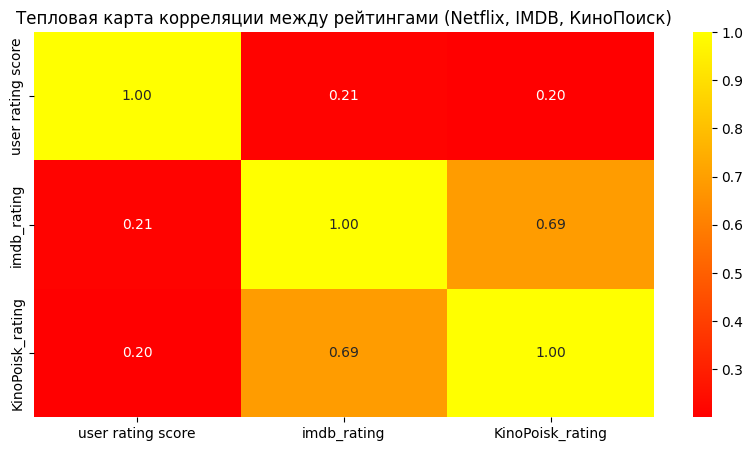

In [42]:
corr_matrix = df_extended[['user rating score', 'imdb_rating', 'KinoPoisk_rating']].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='autumn', cbar=True, fmt='.2f')
plt.title('Тепловая карта корреляции между рейтингами (Netflix, IMDB, КиноПоиск)')
plt.show()

Было решено исследовать каким образом зависят между собой рейтинги. Первоначальная гипотеза - рейтинги должны между собой коррелировать, ведь это оценка пользователей, а они везде +- те же.

После построения тепловой карты видим удивительную зависимость между рейтингом КП и IMDB, однако между последними и user rating score зависимости не наблюдается.

**Вывод** - рейтинг Netflix специфичен, он не подчиняется общемировому рейтингу и рейтингу пользователей с КП.

**Замечание** - на Netflix оценку могут поставить только подписчики, а на imdb и КиноПоиск оценку можно ставить всем зарег. пользователям

Далее посмотрим как расспределены рейтинги с помощью box plot.

In [43]:
ratings_melted = df_extended.assign(
    user_rating_score_10 = df_extended['user rating score'] / 10
).melt(
    value_vars=['user_rating_score_10', 'imdb_rating', 'KinoPoisk_rating'],
    var_name='Рейтинг',
    value_name='Значение')

fig = px.box(
    ratings_melted,
    x='Рейтинг',
    y='Значение',
    title='Box plot: Сравнение распределения оценок (Netflix, IMDB, КиноПоиск)',
    labels={'Рейтинг': 'Источник рейтинга', 'Значение': 'Оценка (10-бальная шкала)'},
    color='Рейтинг')

fig.update_layout(
    xaxis_title='Источник рейтинга',
    yaxis_title='Оценка (10-бальная шкала)',
    boxmode='group')

fig.show()

По этому графику мы видим абсолютную смещенность рейтинга от Netflix что понижает его репрезентативность для нас, и все меньше мы уверены что на него стоит опираться, рейтинг IMDB и KP примерно распределены одинаково. Смещенность Neflix связана с системой оценивания для фильмов, по факту это есть доля нравится от общего числа голосов "нравится" и "не нравится". Поэтому этот рейтинг более смиещенный

In [44]:
genre_ratings = df_extended.groupby('genre')[['imdb_rating', 'KinoPoisk_rating', 'user rating score']].mean().reset_index()

sorted_genres = genre_ratings.sort_values(
    by=['imdb_rating', 'KinoPoisk_rating', 'user rating score'],
    ascending=[False, False, False]
).reset_index(drop=True)

sorted_genres.head(10)

,genre,imdb_rating,KinoPoisk_rating,user rating score
0,"криминал, драма, триллер",9.500,8.908,97.000
1,"детектив, триллер, драма, криминал",9.100,8.854,95.000
2,"аниме, мультфильм, комедия, приключения, боевик",9.000,8.583,57.000
3,"комедия, мелодрама",8.900,9.229,98.000
4,"документальный, криминал",8.800,NaN,88.000
5,"фантастика, триллер, драма, детектив, ужасы",8.700,8.475,80.000
6,"криминал, драма",8.700,8.366,94.000
7,"ужасы, фантастика, фэнтези, триллер, драма, де...",8.700,8.362,90.000
8,"игра, реальное ТВ",8.600,8.447,94.000
9,"драма, история, биография",8.600,8.363,84.000


Обратим внимание, что в многих группах фигурирует Драма, наверное можно прийти к выводу, что именно этот элемент особо привлекает зрителя. Но давайте пойдем дальше, и попытаемся как то определить какой же жанр самый лучший, для этого мы будем использовать нестандартную метрику, которая учитывает позицию в `genre`, общее число указанных жанров а также непосредственно сам рейтинг

### Объяснение метрики

1. **Средний рейтинг шоу**  
   Для шоу $i$ вычисляем средний рейтинг, игнорируя пропуски NaN:  
   $show\_rating_i = \frac{\sum_{\text{не NaN}} (imdb\_rating,\; KinoPoisk\_rating,\; user\; rating)}{\#\{\text{не NaN из }(imdb,\;KinoPoisk,\;user)\}}$

2. **Распределение рейтинга между жанрами**  
   «Взрываем» список жанров и определяем для каждого шоу $i$:
   - $G_i$ — общее число жанров,
   - $p_{i,j}$ — позицию жанра $j$.

3. **Вес жанра**  
   Жанр с меньшей позицией получает больший вес:  
   $alpha_{i,j} = \frac{\frac{1}{p_{i,j}}}{\sum_{m=1}^{G_i} \frac{1}{m}}$

4. **Вклад шоу в жанр**  
   Умножаем рейтинг шоу на соответствующий вес:  
   $score_{i,j}$ = $show\_rating_i \times alpha_{i,j}$

5. **Итоговая оценка жанра**  
   Средний вклад от всех шоу, где встречается жанр $j$:  
   $genre\_score_j = \frac{1}{n_j} \sum_{i \in I_j} score_{i,j}$  

где $n_j$ — количество шоу, содержащих жанр $j$.  

В конце сортируем жанры по убыванию $genre\_score_j$ и берём **топ-10**.


In [45]:
df_extended_copy = df_extended.copy()
df_extended_copy['user rating score'] = df_extended_copy['user rating score'] / 10
df_extended_copy["show_rating"] = df_extended_copy[["imdb_rating", "KinoPoisk_rating", "user rating score"]].mean(axis=1, skipna=True)
df_extended_copy["genre_list"] = df_extended_copy["genre"].str.split(", ")
df_exploded = df_extended_copy.explode("genre_list", ignore_index=True)
df_exploded["p"] = df_exploded.groupby("title").cumcount() + 1
df_exploded["G"] = df_exploded.groupby("title")["genre_list"].transform("count")
df_exploded["inv_p"] = 1 / df_exploded["p"]
df_exploded["sum_inv_p"] = df_exploded.groupby("title")["inv_p"].transform("sum")
df_exploded["alpha"] = df_exploded["inv_p"] / df_exploded["sum_inv_p"]
df_exploded["score"] = df_exploded["show_rating"] * df_exploded["alpha"]
genre_scores = df_exploded.groupby("genre_list")["score"].mean().reset_index()
genre_scores.sort_values("score", ascending=False, inplace=True)

fig = px.bar(
    genre_scores,
    x='score', 
    y='genre_list',
    title='Топ жанров по взвешенной оценке',
    color='score',
    color_continuous_scale=['#FFA500', '#FF8C00', '#FF7F50','#FF6347', '#FF4500']
)

fig.update_layout(
    xaxis_title='Средний Score',
    yaxis_title='Жанр',
    yaxis=dict(autorange='reversed')
)

fig.show()

По нашей новой метрике, на чью 100% правильность мы не настаиваем с отрывом получилось что самые высокооцененные шоу в жанре игра и документальный

**Feature extract**


Далее хотелось бы перейти к более удобному способу работы с рейтингами. Для этого возьмем средневзвешанную оценку по трем рейтингам, и не забдуем привести user rating score в 10 бальный вид.

In [46]:
df_extended['weighted_avg_rating'] = (df_extended['user rating score'] / 10 +
    df_extended['imdb_rating'] +
    df_extended['KinoPoisk_rating']) / 3
df_extended

,title,rating,ratingLevel,release year,user rating score,KinoPoisk_rating,Votes_KinoPoisk,imdb_rating,Votes_imdb,genre,Страны,weighted_avg_rating
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.000,6.396,87065,5.800,165480,"комедия, криминал",США,6.799
1,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.000,8.225,150776,7.600,353710,"драма, мелодрама",США,8.542
2,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.000,8.367,293050,8.300,611933,"боевик, триллер, драма, криминал, детектив","США, Великобритания",8.822
3,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.000,8.621,257678,8.300,750237,"комедия, мелодрама, драма",США,8.774
4,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,95.000,8.239,581174,8.400,503826,"фэнтези, ужасы, триллер, драма, детектив",США,8.713
...,...,...,...,...,...,...,...,...,...,...,...,...
251,Blank Check,PG,Parental guidance suggested. May not be suitab...,1994,93.000,6.200,2436,5.300,22308,"комедия, криминал, семейный",США,6.933
252,Heavyweights,PG,some rude language and pranks,1995,74.000,6.053,2489,6.600,30909,"драма, комедия, семейный, спорт",США,6.684
253,D2: The Mighty Ducks,PG,some mild language and rough hockey action,1994,70.000,6.870,2604,6.100,43270,"спорт, комедия, драма, семейный",США,6.657
254,"Honey, I Shrunk the Kids",PG,Parental guidance suggested. May not be suitab...,1989,80.000,6.954,47007,6.400,167465,"фантастика, комедия, приключения, семейный","США, Мексика",7.118


Давайте посмотрим какие страны в среднем снимают самые высокооцениваемые работы

In [47]:
country_counts = df_extended['Страны'].value_counts()

valid_countries = country_counts[country_counts >= 3].index

country_avg_rating = (df_extended[df_extended['Страны'].isin(valid_countries)]
    .groupby('Страны')['weighted_avg_rating']
    .mean()
    .reset_index())

top_countries = country_avg_rating.sort_values(by='weighted_avg_rating', ascending=False).reset_index(drop=True)
top_countries

,Страны,weighted_avg_rating
0,"Великобритания, США",8.119
1,Великобритания,7.980
2,"США, Великобритания",7.900
3,США,7.657
4,"США, Япония",7.602
5,"Канада, США",7.536
6,Япония,7.399
7,"США, Канада",7.337
8,"США, Индия",7.041
9,"США, Австралия",6.958


Главные страны в съемке - США и Великобритания. У них самый большой рейтинг. Дальше идет Япония, Австралия и Канада.


Давайте посмотрим какие страны снимают больше всех

In [48]:
country_counts = df_extended['Страны'].value_counts().head(5).reset_index()
country_counts.columns = ['Страны', 'Количество работ']

fig = px.bar(
    country_counts,
    x='Количество работ',
    y='Страны',
    title='Топ-5 стран и коллабов по количеству работ',
    color='Количество работ',
    color_continuous_scale=['#FFA500', '#FF8C00', '#FF7F50','#FF6347', '#FF4500']
)

fig.update_layout(
    xaxis_title='Количество работ',
    yaxis_title='Страны',
    yaxis=dict(autorange="reversed")
)

fig.show()


США абсолютный лидер, они сняли целых 164 работы, это перебивает буквально все, никакая другая страна и группа стран не подобрались к такому результату. Хочу отметить, что США помимо единоличного производства светится в каждой группе стран на графике.

Давайте задействуем наши признаки с количеством голосов - **total_votes**. Из них можем создать третий - сумма всех голосов. Далее можем посмотреть на самые резонансные работы с наибольшим количеством оценок, ну и на сами оценки разумеется.

In [49]:
df_extended['total_votes'] = df_extended['Votes_KinoPoisk'] + df_extended['Votes_imdb']

In [50]:
df_extended

,title,rating,ratingLevel,release year,user rating score,KinoPoisk_rating,Votes_KinoPoisk,imdb_rating,Votes_imdb,genre,Страны,weighted_avg_rating,total_votes
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.000,6.396,87065,5.800,165480,"комедия, криминал",США,6.799,252545
1,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.000,8.225,150776,7.600,353710,"драма, мелодрама",США,8.542,504486
2,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.000,8.367,293050,8.300,611933,"боевик, триллер, драма, криминал, детектив","США, Великобритания",8.822,904983
3,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.000,8.621,257678,8.300,750237,"комедия, мелодрама, драма",США,8.774,1007915
4,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,95.000,8.239,581174,8.400,503826,"фэнтези, ужасы, триллер, драма, детектив",США,8.713,1085000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Blank Check,PG,Parental guidance suggested. May not be suitab...,1994,93.000,6.200,2436,5.300,22308,"комедия, криминал, семейный",США,6.933,24744
252,Heavyweights,PG,some rude language and pranks,1995,74.000,6.053,2489,6.600,30909,"драма, комедия, семейный, спорт",США,6.684,33398
253,D2: The Mighty Ducks,PG,some mild language and rough hockey action,1994,70.000,6.870,2604,6.100,43270,"спорт, комедия, драма, семейный",США,6.657,45874
254,"Honey, I Shrunk the Kids",PG,Parental guidance suggested. May not be suitab...,1989,80.000,6.954,47007,6.400,167465,"фантастика, комедия, приключения, семейный","США, Мексика",7.118,214472


C:\Users\BRIGPC\AppData\Local\Temp\ipykernel_60076\4167341203.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




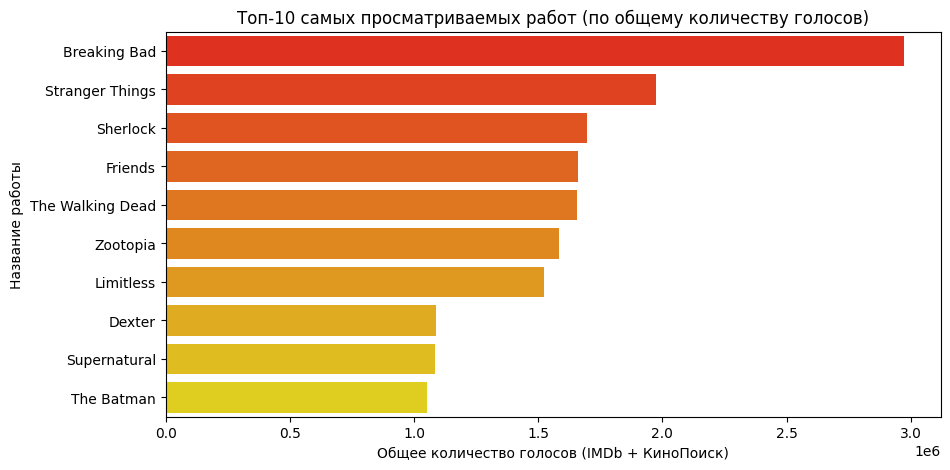

In [51]:
top10_votes = df_extended.sort_values(by='total_votes', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=top10_votes['total_votes'],
    y=top10_votes['title'],
    palette='autumn')

plt.title('Топ-10 самых просматриваемых работ (по общему количеству голосов)')
plt.xlabel('Общее количество голосов (IMDb + КиноПоиск)')
plt.ylabel('Название работы')
plt.show()

Посмотрели на самое популярное шоу, но давайте взглянем на самый популярный жанр по нашему числу голосов, но теперь с такой же весовой логикой как у нас было для самых высокоцененных жанров

Разбиваем список жанров в каждом фильме на отдельные строки (*explode*).  
Для каждого фильма считаем позицию жанра $p_{i,j}$ (1‑й в списке, 2‑й и т.д.) и общее количество жанров $G_{i}$.  
Определяем вес жанра (тем самым распределяя `total_votes` фильма), чтобы **первому** жанру доставалась наибольшая доля, второму — чуть меньше и т.д.

Формула веса:

$ \alpha_{i,j} = \frac{\frac{1}{p_{i,j}}}{\sum_{m=1}^{G_i} \frac{1}{m}} $

«Назначаем» этому жанру соответствующую долю голосов:

$ assigned\_votes_{i,j} = total\_votes_{i} \times \alpha_{i,j}.$

Суммируем такие голоса по каждому жанру и выводим их в сортированном топе



C:\Users\BRIGPC\AppData\Local\Temp\ipykernel_60076\746605244.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




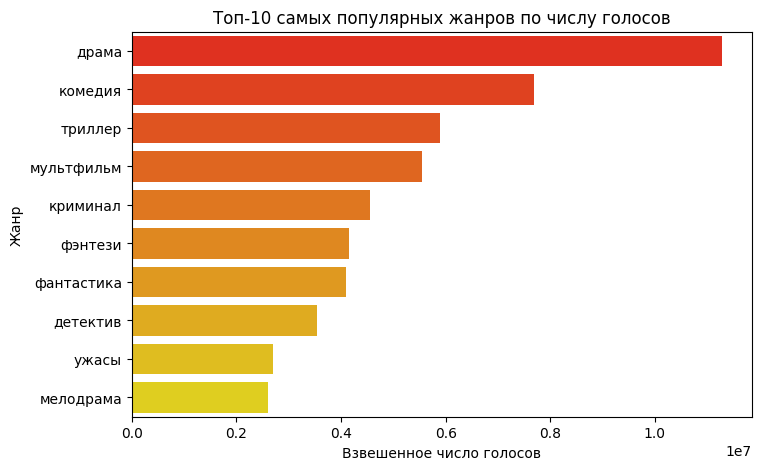

In [52]:
df_temp = df_extended.copy()
df_temp["genre_list"] = df_temp["genre"].apply(lambda x: x.split(", "))
df_exploded = df_temp.explode("genre_list", ignore_index=True)
df_exploded["genre_position"] = df_exploded.groupby("title").cumcount() + 1
df_exploded["genre_count"] = df_exploded.groupby("title")["genre_list"].transform("count")
df_exploded["inv_pos"] = 1.0 / df_exploded["genre_position"]
df_exploded["sum_inv_pos"] = df_exploded.groupby("title")["inv_pos"].transform("sum")
df_exploded["alpha"] = df_exploded["inv_pos"] / df_exploded["sum_inv_pos"]
df_exploded["assigned_votes"] = df_exploded["total_votes"] * df_exploded["alpha"]
genre_popularity = (
    df_exploded
    .groupby("genre_list", as_index=False)["assigned_votes"]
    .sum()
    .rename(columns={"assigned_votes": "genre_votes"})
)

genre_popularity.sort_values("genre_votes", ascending=False, inplace=True)

genre_popularity.head(10)
top10_genres = genre_popularity.head(10)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=top10_genres,
    x="genre_votes",
    y="genre_list",
    palette="autumn"
)

plt.title("Топ-10 самых популярных жанров по числу голосов")
plt.xlabel("Взвешенное число голосов")
plt.ylabel("Жанр")
plt.show()

Драма с отрывом оказалась самым просматриваемым жанром, если считать что количество пользовательских оценок совпадает с популярностью фильма, ведь очевидна зависимость между количеством просмотров и количеством оценок

# Вывод по проекту

### Что мы сделали в проекте и к чему пришли?
Мы взяли датасет с 1000 шоу Netflix (по состоянию на 2017 год) и провели его детальный анализ. В процессе работы мы изучили структуру данных, почистили их, визуализировали ключевые тенденции и сделали несколько интересных выводов.

### С чего мы начали?
Сначала мы познакомились с данными: какие у нас есть колонки, что они означают и насколько они пригодны для анализа. Мы увидели, что в датасете есть названия шоу, их рейтинг (G, PG, TV-MA и т. д.), год выпуска и другие параметры связанные с оценкой пользователя - целевой переменной

### Какие проблемы обнаружили и как их решили?
При первичном осмотре данных мы заметили некоторые пропущенные значения, возможные дубликаты и несоответствия в форматах. Мы почистили датасет: убрали ненужные пробелы, привели даты к правильному формату и заполнили пропущенные значения (где это имело смысл).

### Что интересного мы увидели в данных?
Распределение рейтингов: Мы посмотрели, какие возрастные рейтинги встречаются чаще всего. Оказалось, что среди шоу Netflix преобладают рейтинги TV-MA (для взрослых) и TV-14 (для подростков). Это логично, так как платформа ориентируется на более взрослую аудиторию.

Динамика выхода шоу: Мы выяснили, что количество новых шоу на Netflix активно росло с начала 2000-х и особенно резко увеличилось после 2015 года. Это подтверждает тренд на развитие стриминговых платформ и увеличение инвестиций в контент.

Связь рейтингов и годов выпуска: Интересно, что в последние годы (по состоянию на 2017) всё больше шоу выходило с рейтингом TV-MA. Это говорит о том, что Netflix адаптируется под предпочтения зрителей, предлагая больше контента для взрослых.

Какие шоу получают высокие оценки? Мы изучили рейтинги шоу и увидели, что большинство популярных шоу относятся к категориям драмы и комедии. При этом высокий рейтинг чаще встречается у шоу 

Недостаточность датасета: в самодеятеятельности мы дополнили наш датасет с помощью рейтинга с кинопоиска и imdb, описанием жанра, что позволило нам получить больше информации о данных в изначальном датасете


## Критерии оценки проекта

Оценка за групповой проект в целом — то есть первая из двух оценок — выставляется по 10 балльной шкале, исходя из 5 критериев. Также комиссия на своё усмотрение может добавить (но не снизить) некоторое количество бонусных баллов за рамками данных критериев.

Каждый из критериев будет перечислен и рассмотрен ниже

### Критерий 1. Информативность техническая – необходимо выявить нетривиальные зависимости и тенденции в данных (до 2 баллов)

Данный критерий оценивает, насколько вы продвинулись технически с точки зрения выявления каких-то паттернов, тенденций и зависимостей в данных. Чем более сложные инструменты вы примените в ходе выполнения проекта и чем более сложные и нетривиальные зависимости получите, тем выше будет оценка у вашей команды по данному критерию!

### Критерий 2. Информативность аналитическая – необходимо интерпретировать данные и делать выводы полезные для бизнеса  (до 2 баллов)

Данный критерий оценивает прикладной смысл проделанных вами действий, интерпретацию технических инструментов, умение подсветить полезность и значимость полученных выводов с точки зрения бизнеса, умение переложить полученные результаты на исходные бизнес-цели и "продать" то, что вы сделали.


### Критерий 3. Визуализация – оценивается техническое исполнение графиков (до 2 баллов)

Данный критерий оценивает сложность и техничность ваших визуализаций. Визуализации должны быть наглядными, красивыми, понятными, легко-интерпертируемыми, нетривиальными с точки зрения технического исполнения и выводов, которые они несут в себе.


*Максимальный балл по данному критерию (**2 балла**) нельзя получить, если в работе используются лишь базовые библиотеки визуализаций: Matplotlib и Seaborn*

### Критерий 4. Предобработка датасета – очистка/замена данных (до 1 балла)

Данный критерий оценивает полноту всех проделанных действий с точки зрения подготовки данных и первичной предобработки датасета.


### Критерий 5. Обогащение данными – добавление новых признаков/датасетов (до 3 баллов)

Данный критерий оценивает полноту использования средств feature engineering на основе имеющихся данных, а также средств обогащения данных путем дополнения имеющегося датасета значимой информацией из связанных сторонних датасетов, различных внешних ресурсов и других источников. Обратите внимание, что связанная информация извне не должна замещать или подменять собой исходную задачу и исходные данные в представленном датасете, а должна лишь дополнять и обогощать его. Корректность и глубина проработки взаимодействия со внешними ресурсами и оценивается в рамках данного критерия!

*Максимальный балл по данному критерию (**3 балла**) можно получить только при условии корректной и значимой работы с как минимум двумя источниками внешних данных (двумя внешними датасетами), а также при условии наличия как минимум двух примеров валидного и осмысленного применения средств feature engineering*

*По данному критерию можно получить **2 балла** только при условии корректной и значимой работы с как минимум одним источником внешних данных (внешним датасетом), а также при условии наличия как минимум одного примера валидного и осмысленного применения средств feature engineering*